In [2]:
from pymongo import MongoClient
import pandas as pd
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from textblob import TextBlob
from datetime import datetime
import nltk

In [19]:
pitt_reviews = pd.read_csv("pitt2016_reviews.csv")
pitt_reviews['stars'] = pitt_reviews['stars'].map(float) 
aggregatedStarsByDate = pitt_reviews.groupby('date').mean()
unique_dates = np.unique(pitt_reviews[['date']])
stars = aggregatedStarsByDate['stars'] # Grab unique stars
plotDates = []
for date in unique_dates:
    plotDates.append(datetime.strptime(date, "%Y-%m-%d"))
    
plt.plot(plotDates, stars)


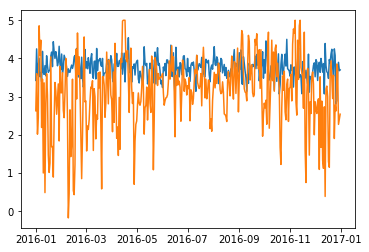

In [20]:
weather_scores = pd.read_csv("avgdailyweather.csv")
dates = weather_scores['date']
scores = weather_scores['score']
weather_dates = []
for date in dates:
    weather_dates.append(datetime.strptime(date, "%m/%d/%Y"))
    
plt.plot(weather_dates, scores)
plt.show()

In [41]:
pitt_scores = pd.read_csv("aggregatedpittreviews.csv")


dates_weather_scores = pd.DataFrame()
dates_weather_scores['date'] = dates
dates_weather_scores['scores'] = scores
dates_weather_scores['stars'] = pitt_scores['stars'] 
dates_weather_scores.to_csv("averageSS.csv")

In [11]:
# 
cli = MongoClient("localhost",27017)
db = cli.yelp
cursorBusiness = db.business.find({"city" : "Pittsburgh", "categories": "Restaurants"}, {"business_id" : 1, "city": 1, "type" : 1}).limit(1000)
# 
pitt_businesses = pd.DataFrame(list(cursorBusiness))
pitt_businesses.head()

,_id,business_id,city,type
0,58d5894730282846474829f7,93otbGHE0s0m-lU1osvg9w,Pittsburgh,business
1,58d589483028284647482a5f,jDqaz1jKdeWk_fTVCzc1Pg,Pittsburgh,business
2,58d589483028284647482a98,HYwbHY-srAOoH-t337DpMw,Pittsburgh,business
3,58d589483028284647482aac,ZYof0WYlilJ3pgWNSgmYKQ,Pittsburgh,business
4,58d589483028284647482abf,u7CxxEzx8hvjoJ8onN4zTg,Pittsburgh,business


We can grab 1000 restaurant ids from Pittsburgh, now to grab reviews on these businesses on the correct days

In [12]:
cursorReview = db.review.find({"business_id": {"$in": list(pitt_businesses['business_id'])}, "date": {"%gt": "2015-12-31", "%lt": "2017-01-01"}}, {"text": 1, "stars": 1, "date": 1}).limit(1)
pitt_reviews = pd.DataFrame(list(cursorReview))
pitt_reviews.head()

""


In [7]:
pitt_reviews['stars'] = pitt_reviews['stars'].map(float) 
aggregatedStarsByDate = pitt_reviews.groupby('date').mean()
unique_dates = np.unique(pitt_reviews[['date']])

KeyError: 'stars'

In [ ]:
def custom_split(string):
    return string.split(' ')[0]
stars = aggregatedStarsByDate['stars'] # Grab unique stars

In [ ]:
plotDates = []
for date in unique_dates:
    plotDates.append(datetime.strptime(date, "%Y-%m-%d"))
    
plt.plot(plotDates, stars)
plt.show()